# 1. Create package for generating Fibo and plotting results

In [1]:
%%bash

pname="$(basename $(pwd))"

if [ -d "./$pname" ] 
then
    rm -rf ./${pname}
fi

# Create subpackages math and plotting
mkdir -p ${pname}/math ${pname}/plotting
for fname in 'fibo' 'prime'; do echo "" > ${pname}/math/${fname}.py; done
echo "" > ${pname}/plotting/utils.py

find ./${pname} -print | sed -e "s;[^/]*/;|____;g;s;____|; |;g";

|____micatutorial3
| |____plotting
| | |____utils.py
| |____math
| | |____prime.py
| | |____fibo.py


### Populate modules

In [2]:
%%bash

fiboCode="
''' Fibonacci numbers module '''

def fib(n):    # write Fibonacci series up to n
    ''' Print Fibonacci sequence up to \`n\`.
    
    Parameters
    ----------
    n : int
        Upper bound for Fibonacci seq.

    '''
    
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
    print()

    
def fib2(n):   # return Fibonacci series up to n
    ''' Compute Fibonacci sequence up to \`n\`.
    
    Parameters
    ----------
    n : int
        Upper bound for Fibonacci seq.

    Returns
    -------
    list
        Fibonacci numbers.
    '''
    
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a+b
    return result
" 

pname="$(basename $(pwd))"
echo "$fiboCode" > ./$pname/math/fibo.py

In [3]:
%%bash

codePrimes="

def is_prime(n):
    '''Check if number is prime.
    
    Parameters
    ----------
    n: int
        Number to test if prime.
        
    Returns
    -------
    bool
        True is number is prime and False otherwise.
        
    '''
    for factor in range(2, n // 2 + 1):
        if n % factor == 0:
            return False
    return True

def compute_primes(n):
    ''' Compute primes numbers from 1 to \`n\`.
    
    Parameters
    ----------
    n : int
        Try numbers from 1 to \`n\`.

    Returns
    -------
    list
        List of prime numbers in range [1, \`n\`]
    '''
    
    primes = []
    for i in range(1, n):
        if is_prime(i):
            primes.append(i)  
    return primes
"

pname="$(basename $(pwd))"
echo "$codePrimes" > ./$pname/math/prime.py

In [4]:
%%bash

codePlot="
import numpy as np
import matplotlib.pyplot as plt

def plot_fibo(numbers, **kwargs):
    ''' Plot Fibonacci numbers.
    
    Parameters
    ----------
    numbers : list
        Sequence of Fibonacci numbers.

    kwargs:
        Additional keyword arguments are passed to \`plt.scatter\`
        
    '''
    
    plt.scatter(range(len(numbers)), numbers, **kwargs)
    plt.xlabel('Rank')
    plt.ylabel('Value')
    

    
# https://jaketae.github.io/study/prime-spirals/    
def _get_coordinate(num):
    return num * np.cos(num), num * np.sin(num)

def plot_primes(numbers, figsize=8, **kwargs):
    ''' Plot prime numbers in spiral.
    
    Parameters
    ----------
    numbers : list
        Sequence of prime numbers.
    
    figsize: int
        Figure size.

    kwargs:
        Additional keyword arguments are passed to \`plt.scatter\`
        
    '''
    
    nums = np.array(list(numbers))
    x, y = _get_coordinate(nums)
    plt.figure(figsize=(figsize, figsize))
    plt.axis('off')
    plt.scatter(x, y, **kwargs)
    plt.show()
"

pname="$(basename $(pwd))"
echo "$codePlot" > ./$pname/plotting/utils.py

# Let's use our package

In [5]:
from micatutorial3.math.prime import compute_primes
from micatutorial3.math.fibo import fib2
from micatutorial3.plotting.utils import plot_fibo, plot_primes

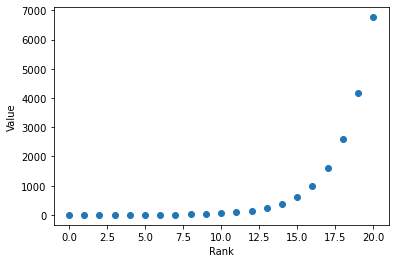

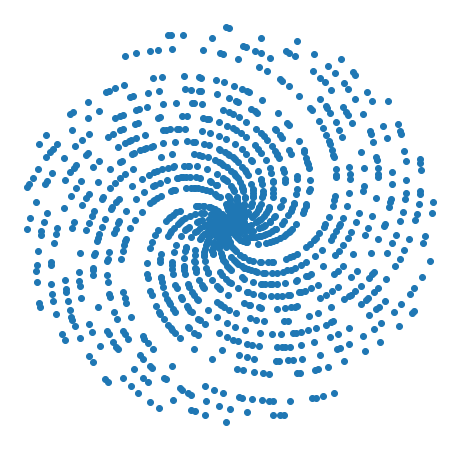

In [6]:
fibSeq = fib2(10000)
plot_fibo(fibSeq)

primes = compute_primes(10000)
plot_primes(primes)

### We cannot do:

In [7]:
from micatutorial3.math import compute_primes

ImportError: cannot import name 'compute_primes' from 'micatutorial3.math' (unknown location)

In [8]:
from micatutorial3.plotting import plot_primes

ImportError: cannot import name 'plot_primes' from 'micatutorial3.plotting' (unknown location)

### Solution - Add \_\_init\_\_.py

In [9]:
%%bash

pname="$(basename $(pwd))"


initMath="
from .prime import compute_primes
from .fibo import fib, fib2

__all__ = ['compute_primes', 'fib', 'fib2']
"

echo "$initMath" > ./$pname/math/__init__.py


initPlot="
from .utils import plot_primes, plot_fibo

__all__ = ['plot_primes', 'plot_fibo']
"

echo "$initPlot" > ./$pname/plotting/__init__.py

echo "" > ./$pname/__init__.py

In [10]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

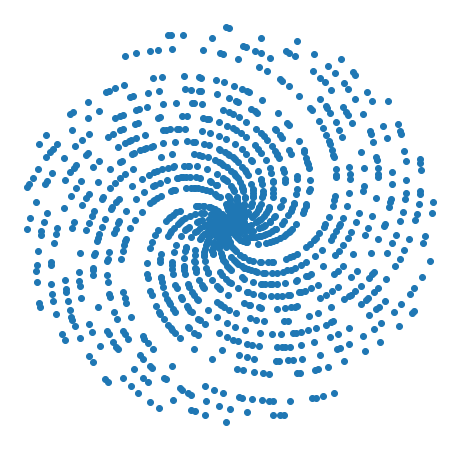

In [1]:
from micatutorial3.math import compute_primes
from micatutorial3.plotting import plot_primes

plot_primes(compute_primes(10000))

## What else is need to build the final package?

* __CHANGES.txt__: log changes with each release

* __LICENSE.txt__

* __MANIFEST.in__: description of what non-code files to include

* __README.txt__: should be written in ReST or Markdown (for PyPi):

* __setup.py__ & __setup.cfg__: for building/installing package

* __docs__: the documentation

* __tests__: your unit tests


https://packaging.python.org/en/latest/guides/distributing-packages-using-setuptools/

https://python-packaging-tutorial.readthedocs.io/en/latest/setup_py.html

In [2]:
%%bash

pname="$(basename $(pwd))"

# These files are included by default
manifest="
include README.rst
include LICENSE
include MANIFEST.in
"

echo "$manifest" > ./MANIFEST.in 


license="
lorem ipsum
"

echo "$license" > ./LICENSE


changes="
Today :) -- Initial release of some package
"
echo "$changes" > ./CHANGELOG.txt


readme="
====================
Example package
====================

.. image:: https://img.shields.io/pypi/l/brainspace?label=License
   :target: https://opensource.org/licenses/BSD-3-Clause



${pname} is a lightweight cross-platform toolbox primarily intended 
for macroscale gradient mapping and analysis of 
neuroimaging and connectome level data. The current version 
of BrainSpace is available in Python and MATLAB, programming 
languages widely used by the neuroimaging and network neuroscience 
communities. The toolbox also contains several maps that allow for 
exploratory analysis of gradient correspondence with other 
brain-derived features, together with tools to generate spatial null models.

For installation instructions, examples and documentation of ${pname} see
our \`documentation <https://${pname}.readthedocs.io>\`_.

Happy gradient analysis!

License
-----------

The package source code is available under the BSD (3-Clause) license.
"
echo "$readme" > ./README.rst




setuppy="
'''A setuptools based setup module.

See:
https://packaging.python.org/guides/distributing-packages-using-setuptools/
https://github.com/pypa/sampleproject
'''

from setuptools import setup, find_packages
from os import path
from io import open as io_open


INSTALL_REQUIRES = ['numpy>=1.11.0',
                    'matplotlib>=2.0.0']
TEST_REQUIRES = []


here = path.abspath(path.dirname(__file__))


# Get the long description from the README file
with open(path.join(here, 'README.rst'), encoding='utf-8') as f:
    long_description = f.read()

__version__ = None
version_file = path.join(here, '$pname/_version.py')
with io_open(version_file, mode='r') as fd:
    exec(fd.read())


setup(

    name='$pname',
    version=__version__,
    description='Python packaging 101',
    long_description=long_description,
    long_description_content_type='text/x-rst',
    url='https://github.com/OualidBenkarim/$pname',
    author='Anonymous',
    author_email='anonymous@mail.com',
    classifiers=[
        'Development Status :: 3 - Alpha',
        'Intended Audience :: Science/Research',
        'Intended Audience :: Developers',
        'Topic :: Software Development :: Build Tools',
        'Topic :: Scientific/Engineering',
        'License :: OSI Approved :: BSD License',
        'Programming Language :: Python',
        'Programming Language :: Python :: 3.5',
        'Programming Language :: Python :: 3.6',
        'Programming Language :: Python :: 3.7',
        'Programming Language :: Python :: 3 :: Only',
    ],
    keywords='prime fibonacci',
#     packages=find_packages(exclude=['contrib', 'docs', 'tests']),
    python_requires='>=3.7',
    install_requires=INSTALL_REQUIRES,
    extras_require={
        'test': TEST_REQUIRES + INSTALL_REQUIRES,
    },
    include_package_data=True,
    zip_safe=False,
    # package_data={  # Optional
    #     'mydata': ['brainspace_data/*'],
    # },
#     project_urls={  # Optional
#         'Documentation': 'https://brainspace.readthedocs.io',
#         'Bug Reports': 'https://github.com/MICA-MNI/BrainSpace/issues',
#         'Source': 'https://github.com/MICA-MNI/BrainSpace',
#     },
#     download_url='https://github.com/MICA-MNI/BrainSpace/archive/'
#                  '{ver}.tar.gz'.format(ver=__version__),
)
"
echo "$setuppy" > ./setup.py


setupcfg="[metadata]
# This includes the license file(s) in the wheel.
# https://wheel.readthedocs.io/en/stable/user_guide.html#including-license-files-in-the-generated-wheel-file
license_files = LICENSE.txt
"
echo "$setupcfg" > ./setup.cfg



gitignore="
docs/build
docs/generated
docs/source/api
test_python

.idea
__pycache__
.pytest_cache
.ipynb_checkpoints

*.egg-info
build
dist

*.m~
*_deprecated.m
*.swp

.vscode

.DS_Store
"
echo "$gitignore" > ./.gitignore


pname="$(basename $(pwd))"
version="
'''${pname} version'''

__version__ = '0.1.0'

"


echo "$version" > ./$pname/_version.py

In [3]:
%%bash
pname="$(basename $(pwd))"
find ../${pname} ! -iname ".*" ! -iname "*pyc" ! -iname "*ipynb" ! -iname "*pycache*" -print | sed -e "s;[^/]*/;|____;g;s;____|; |;g";

|____micatutorial3
| |____LICENSE
| |____setup.cfg
| |____setup.py
| |____README.rst
| |____MANIFEST.in
| |____CHANGELOG.txt
| |____micatutorial3
| | |____plotting
| | | |____utils.py
| | | |______init__.py
| | | | |____utils-checkpoint.py
| | |______init__.py
| | |_____version.py
| | | |______init__-checkpoint.py
| | |____math
| | | |______init__.py
| | | |____prime.py
| | | | |______init__-checkpoint.py
| | | | |____fibo-checkpoint.py
| | | | |____prime-checkpoint.py
| | | |____fibo.py


### Add docs

In [7]:
%%bash 

mkdir -p docs

#pip install sphinx
#pip install sphinx-rtd-theme
#pip install sphinxcontrib-apidoc

#cd docs; sphinx-quickstart

In [8]:
%%bash

rm ./docs/source/conf.py


pname="$(basename $(pwd))"

conf="
# Configuration file for the Sphinx documentation builder.
#
# This file only contains a selection of the most common options. For a full
# list see the documentation:
# http://www.sphinx-doc.org/en/master/config

# -- Path setup --------------------------------------------------------------

# If extensions (or modules to document with autodoc) are in another directory,
# add these directories to sys.path here. If the directory is relative to the
# documentation root, use os.path.abspath to make it absolute, like shown here.
#
import os
import sys
import warnings
sys.path.insert(0, os.path.abspath('../..'))


# import ${pname}

# -- Project information -----------------------------------------------------

project = '${pname}'
copyright = '2019, Authors'
author = 'Authors'


# The version info for the project you're documenting, acts as replacement for
# |version| and |release|, also used in various other places throughout the
# built documents.
#
# The short X.Y version.
version = '0.1.0'
# The full version, including alpha/beta/rc tags.
release = '0.1.0'


# The language for content autogenerated by Sphinx. Refer to documentation
# for a list of supported languages.
#
# This is also used if you do content translation via gettext catalogs.
# Usually you set "language" from the command line for these cases.
language = None


# -- General configuration ---------------------------------------------------

# Add any Sphinx extension module names here, as strings. They can be
# extensions coming with Sphinx (named 'sphinx.ext.*') or your custom
# ones.
extensions = [
#     'sphinx_tabs.tabs',
    'sphinx.ext.autosummary',
    'sphinx.ext.autodoc',
    'sphinx.ext.mathjax',
    'sphinx.ext.viewcode',
    'sphinx.ext.napoleon',
    'sphinx.ext.intersphinx',
    # 'sphinx.ext.autosectionlabel',
    'sphinx.ext.doctest',
#     'sphinx_gallery.gen_gallery',
    'sphinxcontrib.apidoc',
]

apidoc_module_dir = '../../$pname'
# apidoc_output_dir = 'api_python'
apidoc_excluded_paths = ['.ipynb_checkpoints']
apidoc_separate_modules = True

napoleon_google_docstring = False
napoleon_numpy_docstring = True
napoleon_include_init_with_doc = False
napoleon_include_special_with_doc = False
napoleon_use_param = True
napoleon_use_ivar = True
napoleon_use_rtype = False

napoleon_include_private_with_doc = False
# napoleon_include_special_with_doc = False

autodoc_default_options = {
    'members': None,
    'member_order': 'bysource',
    'inherited-members': None,
    'no-special-members': None,
    'exclude-members': 'get_params,set_params',
    'undoc-members': None,
}

autoclass_content = 'class'
# autodoc_default_flags = ['members']


add_function_parentheses = False

autosummary_generate = True

intersphinx_mapping = {
    'python': ('https://docs.python.org/3/', None),
    'numpy': ('http://docs.scipy.org/doc/numpy/', None),
    'sklearn': ('http://scikit-learn.org/stable', None),
    'scipy': ('https://docs.scipy.org/doc/scipy/reference', None),
}


# Add any paths that contain templates here, relative to this directory.
templates_path = ['_templates']

# The suffix(es) of source filenames.
source_suffix = '.rst'

# The master toctree document.
master_doc = 'index'


# List of patterns, relative to source directory, that match files and
# directories to ignore when looking for source files.
# This pattern also affects html_static_path and html_extra_path.
exclude_patterns = ['_build', 'Thumbs.db', '.DS_Store']


# The name of the Pygments (syntax highlighting) style to use.
pygments_style = 'sphinx'


todo_include_todos = False


# -- Options for HTML output -------------------------------------------------
html_theme = 'sphinx_rtd_theme'
html_static_path = ['_static']

# refs: http://alabaster.readthedocs.io/en/latest/installation.html#sidebars
html_sidebars = {
    '**': [
        'about.html',
        'navigation.html',
        'relations.html',  # needs 'show_related': True theme option to display
        'searchbox.html',
        'donate.html',
    ]
}


# -- Options for HTMLHelp output ------------------------------------------

# Output file base name for HTML help builder.
htmlhelp_basename = '${pname}doc'


# -- Options for LaTeX output ---------------------------------------------
# Grouping the document tree into LaTeX files. List of tuples
# (source start file, target name, title,
#  author, documentclass [howto, manual, or own class]).
latex_documents = [
    (master_doc, '${pname}.tex', u'${pname} Documentation',
     u'Authors', 'manual'),
]


# -- Options for manual page output ---------------------------------------
man_pages = [
    (master_doc, '${pname}', u'${pname} Documentation',
     [author], 1)
]


# -- Options for Texinfo output -------------------------------------------
texinfo_documents = [
    (master_doc, '${pname}', u'${pname} Documentation',
     author, '${pname}', 'One line description of project.',
     'Miscellaneous'),
]
"

echo "$conf" > ./docs/source/conf.py



echo "sphinx_rtd_theme" > ./docs/source/requirements.txt
echo "sphinxcontrib.apidoc" >> ./docs/source/requirements.txt





In [9]:
%%bash


pname="$(basename $(pwd))"


indexDoc="

.. ${pname} documentation master file, created by
   sphinx-quickstart

Welcome to ${pname}'s documentation!
================================================
.. image:: https://img.shields.io/pypi/l/brainspace?label=License
   :target: https://opensource.org/licenses/BSD-3-Clause



${pname} is a lightweight cross-platform toolbox primarily intended 
for macroscale gradient mapping and analysis of 
neuroimaging and connectome level data. The current version 
of BrainSpace is available in Python and MATLAB, programming 
languages widely used by the neuroimaging and network neuroscience 
communities. The toolbox also contains several maps that allow for 
exploratory analysis of gradient correspondence with other 
brain-derived features, together with tools to generate spatial null models.

For installation instructions, examples and documentation of ${pname} see
our \`documentation <https://${pname}.readthedocs.io>\`_.


Content
=======



.. toctree::
   :maxdepth: 2
   :caption: Contents:



Indices and tables
==================

* :ref:\`genindex\`
* :ref:\`modindex\`
* :ref:\`search\`

"

echo "$indexDoc" > ./docs/source/index.rst

In [10]:
!cd docs/; make html

Running Sphinx v4.1.2
making output directory... done
[autosummary] generating autosummary for: .ipynb_checkpoints/index-checkpoint.rst, index.rst
loading intersphinx inventory from https://docs.python.org/3/objects.inv...
loading intersphinx inventory from http://docs.scipy.org/doc/numpy/objects.inv...
loading intersphinx inventory from http://scikit-learn.org/stable/objects.inv...
loading intersphinx inventory from https://docs.scipy.org/doc/scipy/reference/objects.inv...
intersphinx inventory has moved: https://docs.scipy.org/doc/scipy/reference/objects.inv -> https://docs.scipy.org/doc/scipy/objects.inv
intersphinx inventory has moved: http://docs.scipy.org/doc/numpy/objects.inv -> https://numpy.org/doc/stable/objects.inv
intersphinx inventory has moved: http://scikit-learn.org/stable/objects.inv -> https://scikit-learn.org/stable/objects.inv
Creating file /home/oualid/Desktop/python_tutorial/micatutorial3/docs/source/api/micatutorial3.rst.
Creating file /home/oualid/Desktop/python

## ReadTheDocs

* Before we need to have our package in github
* https://readthedocs.org/dashboard/

In [11]:
%%bash

pname="$(basename $(pwd))"

git init
git add .
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/OualidBenkarim/${pname}.git
git push -u origin main

Initialized empty Git repository in /home/oualid/Desktop/python_tutorial/micatutorial3/.git/
[master (root-commit) 77ab14d] first commit
 21 files changed, 2599 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 CHANGELOG.txt
 create mode 100644 LICENSE
 create mode 100644 MANIFEST.in
 create mode 100644 README.rst
 create mode 100644 docs/Makefile
 create mode 100644 docs/make.bat
 create mode 100644 docs/source/conf.py
 create mode 100644 docs/source/index.rst
 create mode 100644 docs/source/requirements.txt
 create mode 100644 micatutorial3/__init__.py
 create mode 100644 micatutorial3/_version.py
 create mode 100644 micatutorial3/math/__init__.py
 create mode 100644 micatutorial3/math/fibo.py
 create mode 100644 micatutorial3/math/prime.py
 create mode 100644 micatutorial3/plotting/__init__.py
 create mode 100644 micatutorial3/plotting/utils.py
 create mode 100644 module_example.ipynb
 create mode 100644 package_example.ipynb
 create mode 100644 setup.cfg
 create mode

To https://github.com/OualidBenkarim/micatutorial3.git
 * [new branch]      main -> main


## Create a distribution

In [12]:
# !python3 -m pip install build # install build pacakge

!python3 -m build --sdist
!python3 -m build --wheel

* Creating venv isolated environment...
* Installing packages in isolated environment... (setuptools >= 40.8.0, wheel)
* Getting dependencies for sdist...
running egg_info
creating micatutorial3.egg-info
writing micatutorial3.egg-info/PKG-INFO
writing dependency_links to micatutorial3.egg-info/dependency_links.txt
writing requirements to micatutorial3.egg-info/requires.txt
writing top-level names to micatutorial3.egg-info/top_level.txt
writing manifest file 'micatutorial3.egg-info/SOURCES.txt'
reading manifest file 'micatutorial3.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'micatutorial3.egg-info/SOURCES.txt'
* Building sdist...
running sdist
running egg_info
writing micatutorial3.egg-info/PKG-INFO
writing dependency_links to micatutorial3.egg-info/dependency_links.txt
writing requirements to micatutorial3.egg-info/requires.txt
writing top-level names to micatutorial3.egg-info/top_level.txt
reading manifest file 'micatutorial3.egg-info/SOURCES.tx

In [13]:
ls -l dist

total 8
-rw-rw-r-- 1 oualid oualid 1855 Mar 17 15:41 micatutorial3-0.1.0-py3-none-any.whl
-rw-rw-r-- 1 oualid oualid 2385 Mar 17 15:40 micatutorial3-0.1.0.tar.gz


### Upload project to PyPi

In [14]:
%%bash

pw="$(cat ../password_testpypi.txt)"


# !pip install twine
twine upload -u Oualid -p $pw --repository testpypi dist/* --verbose

Uploading distributions to https://test.pypi.org/legacy/
  dist/micatutorial3-0.1.0-py3-none-any.whl (1.8 KB)
  dist/micatutorial3-0.1.0.tar.gz (2.3 KB)
username set by command options
password set by command options
username: Oualid
password: <hidden>
Uploading micatutorial3-0.1.0-py3-none-any.whl
100%|██████████| 7.39k/7.39k [00:01<00:00, 5.47kB/s]
Response from https://test.pypi.org/legacy/:
200 OK
Uploading micatutorial3-0.1.0.tar.gz
100%|██████████| 7.42k/7.42k [00:01<00:00, 7.17kB/s]
Response from https://test.pypi.org/legacy/:
200 OK

View at:
https://test.pypi.org/project/micatutorial3/0.1.0/


### Github actions

* https://packaging.python.org/en/latest/guides/publishing-package-distribution-releases-using-github-actions-ci-cd-workflows/

In [15]:
%%bash

pname="$(basename $(pwd))"


newCodePlot="

def plot_primes_simple(numbers, **kwargs):
    ''' Plot Prime numbers.
    
    Parameters
    ----------
    numbers : list
        Sequence of prime numbers.

    kwargs:
        Additional keyword arguments are passed to \`plt.scatter\`
        
    '''
    
    plt.scatter(range(len(numbers)), numbers, **kwargs)
    plt.xlabel('Rank')
    plt.ylabel('Value')
    
"


echo "$newCodePlot" >> ./$pname/plotting/utils.py



version="
'''${pname} version'''

__version__ = '0.1.1'

"


echo "$version" > ./$pname/_version.py

In [16]:
%%bash

mkdir -p .github/workflows/


publishCode="

name: 'test_release'

on:
  push:
    branches:
      - main

jobs:
  development-release:
    name: 'Test release'
    runs-on: 'ubuntu-latest'

    steps:
    - uses: actions/checkout@v2
    
    - name: Set up Python 3.8.
      uses: actions/setup-python@v2
      with:
        python-version: 3.8
    
    - name: Install package
      run: |
        python -m pip install --upgrade pip
        python -m pip install --upgrade setuptools wheel
    
    
    - name: Build binary wheel and tarball.
      run: |
        python setup.py sdist bdist_wheel
    - name: Publish to PyPi test.
      uses: pypa/gh-action-pypi-publish@master
      with:
        password: \${{ secrets.TEST_PYPI_API_TOKEN }}
        repository_url: https://test.pypi.org/legacy/
        
"

echo "$publishCode" > .github/workflows/test_release.yml

In [18]:
%%bash

git add .
git commit -a -m "Add github action"
git push

[main 412fc14] Add github action
 4 files changed, 280 insertions(+), 14 deletions(-)
 create mode 100644 .github/workflows/test_release.yml


To https://github.com/OualidBenkarim/micatutorial3.git
   77ab14d..412fc14  main -> main


In [17]:
cat .github/workflows/test_release.yml



name: 'test_release'

on:
  push:
    branches:
      - main

jobs:
  development-release:
    name: 'Test release'
    runs-on: 'ubuntu-latest'

    steps:
    - uses: actions/checkout@v2
    
    - name: Set up Python 3.8.
      uses: actions/setup-python@v2
      with:
        python-version: 3.8
    
    - name: Install package
      run: |
        python -m pip install --upgrade pip
        python -m pip install --upgrade setuptools wheel
    
    
    - name: Build binary wheel and tarball.
      run: |
        python setup.py sdist bdist_wheel
    - name: Publish to PyPi test.
      uses: pypa/gh-action-pypi-publish@master
      with:
        password: ${{ secrets.TEST_PYPI_API_TOKEN }}
        repository_url: https://test.pypi.org/legacy/
        

